Fist lets import the some necessary libraries and the Mist dataset

In [45]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
%matplotlib inline

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [57]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [ ]:
def preprocess(data, image_width=28,image_heigth=28):
    return data.reshape(image_width,image_heigth)

train = np.array([i.reshape(28,28) for i in mnist.train.images])

In [8]:
image_width = 28
image_heigth = 28
conv_fmaps= 64
conv_ksize = 6

pool_size = (4)
pool_stride = 1
n_outputs = 10
max_pool_dropout_rate = 0.5
training = tf.placeholder_with_default(False, shape=[], name='training')
fc_dropout_rate = 0.25

x = tf.placeholder(tf.float32,shape = [None,28,28])

y = tf.placeholder(tf.float32, shape=[None,10])

conv1 = tf.layers.conv1d(x,filters=conv_fmaps,kernel_size=conv_ksize,activation=tf.nn.relu)
#conv2 = tf.layers.conv1d(conv1,filters=conv_fmap,kernel_size=conv_ksize,activation=tf.nn.relu)
max_pool = tf.layers.max_pooling1d(conv1,pool_size=pool_size,strides=pool_stride)
max_pool_drop = tf.layers.dropout(max_pool,rate=max_pool_dropout_rate, training=training)
max_pool_flatten = tf.reshape(max_pool_drop,shape =[-1,20*64])
y_=tf.layers.dense(max_pool_flatten,n_outputs, activation=tf.nn.relu)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_,labels=y))
optimizer = tf.train.AdamOptimizer()
training_op = optimizer.minimize(loss)

In [9]:
max_pool

<tf.Tensor 'max_pooling1d_2/Squeeze:0' shape=(?, 20, 64) dtype=float32>

In [10]:
tf.InteractiveSession().close()
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

correct_prediction1 = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

tf.global_variables_initializer().run()
c=0
for i in range(60000):
    batch_xs, batch_ys = mnist.train.next_batch(150)
    batch_xs = np.array([i.reshape(28,28) for i in batch_xs])
    sess.run(training_op, feed_dict={x: batch_xs, y: batch_ys, training:True})
    if c >1000:
        print("i=",i)
        batch_xs_test, batch_ys_test = mnist.test.next_batch(150)
        batch_xs_test = np.array([i.reshape(28,28) for i in batch_xs_test])
        print(accuracy.eval(feed_dict={x: batch_xs, y: batch_ys}))
        print(accuracy.eval(feed_dict={x: batch_xs_test, y: batch_ys_test}))
        c=0
    else:
        c+=1


C:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\client\session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
i= 1001
1.0
0.97333336
i= 2003
0.99333334
0.97333336
i= 3005
1.0
0.9866667
i= 4007
0.9866667
0.9866667
i= 5009
0.9866667
0.99333334
i= 6011
1.0
0.99333334
i= 7013
1.0
0.99333334
i= 8015
0.99333334
0.9866667
i= 9017
1.0
0.99333334
i= 10019
1.0
1.0
i= 11021
1.0
0.9866667
i= 12023
1.0
0.99333334
i= 13025
1.0
0.99333334
i= 14027
0.99333334
0.9866667
i= 15029
1.0
1.0
i= 16031
0.9866667
0.99333334
i= 17033
1.0
0.9866667
i= 18035
1.0
1.0
i= 19037
1.0
0.99333334
i= 20039
1.0
1.0
i= 21041
1.0
0.98
i= 22043
0.99333334
0.9866667
i= 23045
1.0
0.99333334
i= 24047
1.0
0.99333334
i= 25049
1.0
0.98
i= 26051
1.0
0.9866667
i= 27053
1.0
0.97333336
i= 28055
1.0
0.99333334
i= 29057
1.0
0.9866667
i= 30059
1.0
0.98
i= 31061
1.0
0.9866667
i= 32063
1.0
0.9866667
i= 33065
1.0
0.99333334
i= 34067
1.0
1.0
i= 35069
1.0
0.99

In [61]:
test_reshaped = np.array([i.reshape(28,28) for i in mnist.test.images])
print(accuracy.eval(feed_dict={x: test_reshaped, y: mnist.test.labels}))

0.9894


In [62]:
correct_vals = sess.run(correct_prediction1, feed_dict ={x:test_reshaped,y:mnist.test.labels})
pred_vals = sess.run(y_,feed_dict={x:test_reshaped})

print("Total number of misclassified images=",correct_vals.shape[0]- np.sum(correct_vals))

Total number of misclassified images= 106


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014A93EA26A0>]],
      dtype=object)

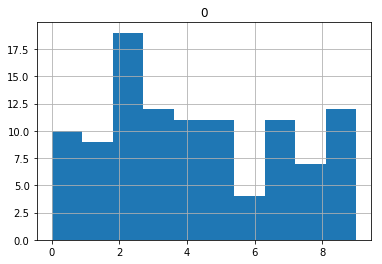

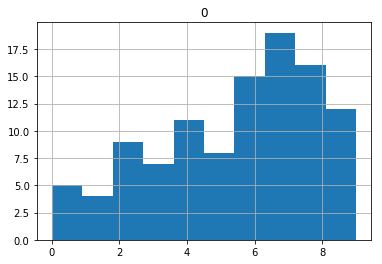

In [108]:

incorrect_labels = []
true_labels = []
for i,vals in enumerate(correct_vals):
    
    if  not vals:
        #plt.subplot()
        image = mnist.test.images[i].reshape(28,28)
        #print(i)
        #plt.imshow(image)
        #print ("Predicted label",np.argmax(pred_vals[i],0))
        #print("True label",np.argmax(mnist.test.labels[i],0))
        incorrect_labels.append(np.argmax(pred_vals[i],0))
        true_labels.append(np.argmax(mnist.test.labels[i],0))

incorrect_labels_pd = pd.DataFrame(incorrect_labels)
incorrect_labels_pd.hist() 
true_labels_pd = pd.DataFrame(true_labels)
true_labels_pd.hist()

In [131]:
s= pd.get_dummies(incorrect_labels)
c = pd.get_dummies(true_labels)
d = pd.concat([s,c],axis=1, keys = ['incorrect','correct'])
#d.pivot_table(index = 'incorrect',margins = 'correct*')